<a href="https://colab.research.google.com/github/Tonic4to/Disease-Identification-And-prevention/blob/main/Pest_%2B_Disease_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Models:

CNN image classification - Identifies the crop, identifies the parasite.

# CNN Image Classification


In [9]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from google.colab import auth
from google.colab import drive
import json
import os


In [2]:
# Authenticate and get Google Drive access
auth.authenticate_user()

# Use the secrets stored in Colab
# To access secrets, use the `os.environ.get` method
token = os.getenv('GITHUB_TOKEN')


In [3]:
#Depreciated
'''
# Authenticate and mount Google Drive.
auth.authenticate_user()
drive.mount('/content/drive')

# Path to the file where the token is stored (e.g., /content/drive/My Drive/colab_secrets.json)
secrets_file = '/content/drive/My Drive/colab_secrets.json'
'
# Load the token from the secrets file
with open(secrets_file) as f:
    secrets = json.load(f)
    token = secrets['GITHUB_TOKEN']
'''

#Depreciated
'''
# Authenticate and get Google Drive access
auth.authenticate_user()

secrets = output.eval_js('google.colab.kernel.getSecret("GITHUB_TOKEN")')
token = secrets['GITHUB_TOKEN']
'''
# Install Kaggle package
!pip install kaggle

# Install dos2unix
!apt-get install dos2unix

# Remove the existing repository directory if it exists
!rm -rf Disease-Identification-And-prevention

# Clone the repository using the token
!git clone https://{token}@github.com/Tonic4to/Disease-Identification-And-prevention.git

# Convert the line endings of the shell script
!dos2unix Disease-Identification-And-prevention/config/setup_kaggle.sh

# Run the shell script to set up Kaggle configuration
!bash Disease-Identification-And-prevention/config/setup_kaggle.sh

# Download a dataset using the Kaggle API
!kaggle datasets download -d marquis03/plants-classification

# Create a directory to unzip the dataset
!mkdir -p dataset_directory

# Unzip the dataset and overwrite files without prompting
!unzip -o -q plants-classification.zip -d dataset_directory

# List the contents of the dataset directory to verify
#!ls dataset_directory




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 384 kB of archives.
After this operation, 1,367 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 dos2unix amd64 7.4.2-2 [384 kB]
Fetched 384 kB in 1s (269 kB/s)
Selecting previously unselected package dos2unix.
(Reading database ... 123588 files and directories currently installed.)
Preparing to unpack .../dos2unix_7.4.2-2_amd64.deb ...
Unpacking dos2unix (7.4.2-2) ...
Setting up dos2unix (7.4.2-2) ...
Processing triggers for man-db (2.10.2-1) ...
Cloning into 'Disease-Identification-And-prevention'...
fatal: could not read Password for 'https://None@github.com': No such device or address
dos2unix: Disease-Identification-And-prevention/config/setup_kaggle.sh: No such file or directory
dos2unix: Skipping Dise

In [ ]:
'''
#Depreciated - use bash script method
!git clone https://github.com/Tonic4to/Disease-Identification-And-prevention.git
!pip install kaggle
%cd Disease-Identification-And-prevention/config
#Moves Kaggle.json to API location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#Downloads Dataset
!kaggle datasets download -d marquis03/plants-classification
'''

In [10]:
#Working Best?? Different Loading method
def get_image_paths_and_labels(csv_file, base_image_dir):
    df = pd.read_csv(csv_file)
    df.columns = df.columns.str.strip()  # Ensure column names are stripped of extra spaces
    image_paths = [os.path.join(base_image_dir, row['image:FILE']) for _, row in df.iterrows()]
    labels = df['category'].values
    return image_paths, labels

def load_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])  # Resize image
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

def create_dataset(image_paths, labels, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=len(image_paths))
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

# Define base paths
train_image_dir = '/content/dataset_directory'
test_image_dir = '/content/dataset_directory'
val_image_dir = '/content/dataset_directory'

# Get image paths and labels
train_image_paths, train_labels = get_image_paths_and_labels('/content/dataset_directory/train.csv', train_image_dir)
test_image_paths, test_labels = get_image_paths_and_labels('/content/dataset_directory/test.csv', test_image_dir)
val_image_paths, val_labels = get_image_paths_and_labels('/content/dataset_directory/val.csv', val_image_dir)

# Display some of the image paths and labels
print("Train Image Paths and Labels:")
for i in range(5):  # Display first 5 entries
    print(f"Image Path: {train_image_paths[i]}, Label: {train_labels[i]}")

print("\nTest Image Paths and Labels:")
for i in range(5):
    print(f"Image Path: {test_image_paths[i]}, Label: {test_labels[i]}")

print("\nValidation Image Paths and Labels:")
for i in range(5):
    print(f"Image Path: {val_image_paths[i]}, Label: {val_labels[i]}")

# Create datasets
train_dataset = create_dataset(train_image_paths, train_labels)
test_dataset = create_dataset(test_image_paths, test_labels)
val_dataset = create_dataset(val_image_paths, val_labels)


Train Image Paths and Labels:
Image Path: /content/dataset_directory/train/aloevera/aloevera0.jpg, Label: 0
Image Path: /content/dataset_directory/train/aloevera/aloevera1.jpg, Label: 0
Image Path: /content/dataset_directory/train/aloevera/aloevera2.jpg, Label: 0
Image Path: /content/dataset_directory/train/aloevera/aloevera3.jpg, Label: 0
Image Path: /content/dataset_directory/train/aloevera/aloevera4.jpg, Label: 0

Test Image Paths and Labels:
Image Path: /content/dataset_directory/test/aloevera/aloevera800.jpg, Label: 0
Image Path: /content/dataset_directory/test/aloevera/aloevera801.jpg, Label: 0
Image Path: /content/dataset_directory/test/aloevera/aloevera802.jpg, Label: 0
Image Path: /content/dataset_directory/test/aloevera/aloevera803.jpg, Label: 0
Image Path: /content/dataset_directory/test/aloevera/aloevera804.jpg, Label: 0

Validation Image Paths and Labels:
Image Path: /content/dataset_directory/val/aloevera/aloevera700.jpg, Label: 0
Image Path: /content/dataset_directory/va

In [12]:
#T2 Model
# Define the model
num_classes = 30
model2 = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Convolutional Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the output
    Flatten(),

    # Fully Connected Layer
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to reduce overfitting

    # Output Layer
    Dense(num_classes, activation='softmax')
])

# Print the model summary
model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │          15,390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,954,206 (49.42 MB)

 Trainable params: 12,954,206 (49.42 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#T2 Compile

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:
history2 = model2.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    batch_size=32
)


Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 65s 36ms/step - accuracy: 0.1393 - loss: 3.0110 - val_accuracy: 0.3343 - val_loss: 2.3108
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 76s 31ms/step - accuracy: 0.3436 - loss: 2.2114 - val_accuracy: 0.4950 - val_loss: 1.8124
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.4866 - loss: 1.7124 - val_accuracy: 0.5743 - val_loss: 1.5673
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.6342 - loss: 1.1935 - val_accuracy: 0.6140 - val_loss: 1.4402
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 94s 40ms/step - accuracy: 0.7495 - loss: 0.7860 - val_accuracy: 0.6653 - val_loss: 1.3608
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 65s 27ms/step - accuracy: 0.8144 - loss: 0.5618 - val_accuracy: 0.6907 - val_loss: 1.4071
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 87s 37ms/step - accuracy: 0.8626 - loss: 0.4009 - val_accuracy: 0.6970 - val_loss: 1.4948
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 77s 26ms/step - accuracy: 0.8820 - loss: 0.3251 - 

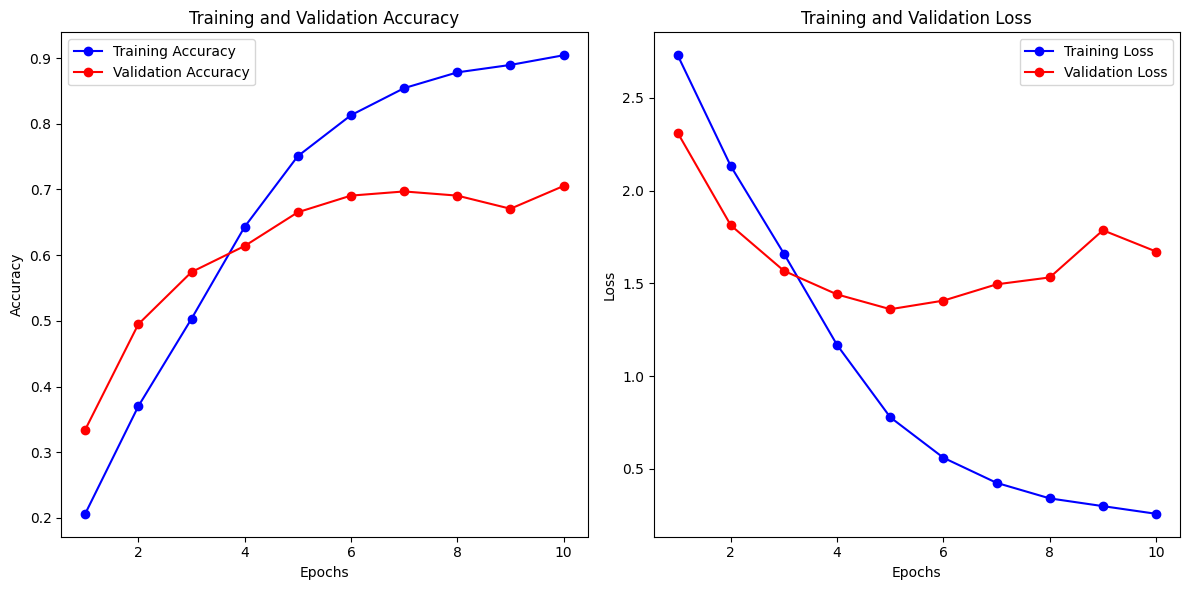

In [16]:
# Extract the training and validation metrics from the history object
history2_dict = history2.history
epochs = range(1, len(history2_dict['accuracy']) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, history2_dict['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history2_dict['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history2_dict['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history2_dict['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
#Verifying Directory Contents
# List the contents of the dataset directory
print("Contents of dataset_directory:")
print(os.listdir('/content/dataset_directory'))

# If the CSV files are in subdirectories, list their contents
print("\nContents of train directory:")
print(os.listdir('/content/dataset_directory/train'))

print("\nContents of test directory:")
print(os.listdir('/content/dataset_directory/test'))

print("\nContents of val directory:")
print(os.listdir('/content/dataset_directory/val'))


Contents of dataset_directory:
['test', 'train.csv', 'val', 'val.csv', 'test.csv', 'train']

Contents of train directory:
['guava', 'corn', 'coconut', 'kale', 'shallot', 'orange', 'aloevera', 'mango', 'tobacco', 'peperchili', 'cantaloupe', 'papaya', 'classname.txt', 'curcuma', 'cucumber', 'watermelon', 'ginger', 'galangal', 'pineapple', 'spinach', 'soybeans', 'eggplant', 'sweetpotatoes', 'cassava', 'banana', 'pomelo', 'bilimbi', 'longbeans', 'waterapple', 'paddy', 'melon']

Contents of test directory:
['guava', 'corn', 'coconut', 'kale', 'shallot', 'orange', 'aloevera', 'mango', 'tobacco', 'peperchili', 'cantaloupe', 'papaya', 'classname.txt', 'curcuma', 'cucumber', 'watermelon', 'ginger', 'galangal', 'pineapple', 'spinach', 'soybeans', 'eggplant', 'sweetpotatoes', 'cassava', 'banana', 'pomelo', 'bilimbi', 'longbeans', 'waterapple', 'paddy', 'melon']

Contents of val directory:
['guava', 'corn', 'coconut', 'kale', 'shallot', 'orange', 'aloevera', 'mango', 'tobacco', 'peperchili', 'cant

In [23]:
#Helper Function Time
# Define image size
IMG_SIZE = (128, 128)
'''
def load_and_process_images(file_path):
  #load image (Might take a while because we are loading a lot)
  image = load_img(file_path, target_size = IMG_SIZE)
  #convert to array
  image = img_to_array(image)
  #Normalize
  image = image /255.0
  return image

def load_dataset(csv_file, base_dir, batch_size=32):
    def gen():
        for _, row in csv_file.iterrows():
            file_path = os.path.join(base_dir, row['image:FILE'])
            image = load_and_process_images(file_path)
            label = row['category']
            yield image, label

def load_dataset(csv_file, base_dir, batch_size=32):
    def gen():
        for _, row in csv_file.iterrows():
            # Adjust this to remove the extra subdirectory
            file_path = os.path.join(base_dir, row['image:FILE'])
            file_path = file_path.replace('/train/', '/').replace('/test/', '/').replace('/val/', '/')
            if not os.path.exists(file_path):
                print(f"Warning: File not found {file_path}")
                continue  # Skip missing files
            image = load_and_process_images(file_path)
            label = row['category']
            yield image, label

    dataset = tf.data.Dataset.from_generator(
        gen,
        output_signature=(
            tf.TensorSpec(shape=(128, 128, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(), dtype=tf.int32)
        )
    )
    dataset = dataset.batch(batch_size)
    return dataset

# Load datasets
batch_size = 32
train_dataset = load_dataset(train_labels, '/content/dataset_directory/train', batch_size)
test_dataset = load_dataset(test_labels, '/content/dataset_directory/test', batch_size)
val_dataset = load_dataset(val_labels, '/content/dataset_directory/val', batch_size)

#Depreciated
#Validate shapes
print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Validation images shape: {val_images.shape}")
'''

'\n#Depreciated\n#Validate shapes\nprint(f"Train images shape: {train_images.shape}")\nprint(f"Test images shape: {test_images.shape}")\nprint(f"Validation images shape: {val_images.shape}")\n'

In [24]:
# Inspect a sample from the dataset
for image_batch, label_batch in train_dataset.take(1):
    print("Sample image batch shape:", image_batch.shape)
    print("Sample label batch shape:", label_batch.shape)
    print("Sample labels:", label_batch.numpy())


Sample image batch shape: (32, 128, 128, 3)
Sample label batch shape: (32,)
Sample labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#Create a model
# Check the unique values in the 'category' column
num_classes = len(pd.concat([train_labels, test_labels, val_labels])['category'].unique())
print(f"Number of unique classes: {num_classes}")

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#Test only
'''def print_directory_contents(path):
    for root, dirs, files in os.walk(path):
        level = root.replace(path, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print(f'{subindent}{f}')

print_directory_contents('/content/dataset_directory')
'''

In [27]:
# Train the model using the dataset
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10)

Epoch 1/10
    657/Unknown 78s 103ms/step - accuracy: 0.2449 - loss: 5.8170

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


657/657 ━━━━━━━━━━━━━━━━━━━━ 91s 123ms/step - accuracy: 0.2446 - loss: 5.8151 - val_accuracy: 0.0333 - val_loss: 3.4120
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 72s 110ms/step - accuracy: 0.0452 - loss: 3.2187 - val_accuracy: 0.0333 - val_loss: 3.4089
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 74s 112ms/step - accuracy: 0.0384 - loss: 3.2449 - val_accuracy: 0.0333 - val_loss: 3.4067
Epoch 4/10
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.0026 - loss: 3.3440

KeyboardInterrupt: 

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 77s 108ms/step - accuracy: 0.2929 - loss: 6.6690 - val_accuracy: 0.0333 - val_loss: 3.4102
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 67s 103ms/step - accuracy: 0.0353 - loss: 3.3208 - val_accuracy: 0.0333 - val_loss: 3.4079
Epoch 3/10
556/657 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.0388 - loss: 3.3147

KeyboardInterrupt: 

# M2

In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from google.colab import auth
from google.colab import drive
import json
import os

To plot the accuracy and validation loss during training, you can use the history object returned by the model.fit() method. This object contains the training and validation metrics for each epoch, which you can extract and plot using libraries like Matplotlib.

Here's how you can plot these metrics:

1. Import Matplotlib
First, make sure you have Matplotlib installed. If not, you can install it using:

bash
Copy code
pip install matplotlib
2. Plot Accuracy and Loss
Use the following code to plot the training and validation accuracy and loss:

python
Copy code
import matplotlib.pyplot as plt
#---------------------------------------------------------------------------
#Accessing Github
#---------------------------------------------------------------------------
# Authenticate and get Google Drive access
auth.authenticate_user()
# Use the secrets stored in Colab
# To access secrets, use the `os.environ.get` method
token = os.getenv('GITHUB_TOKEN')
#---------------------------------------------------------------------------
#Importing Kaggle Dataset
#---------------------------------------------------------------------------
# Install Kaggle package
!pip install kaggle
# Install dos2unix
!apt-get install dos2unix
# Remove the existing repository directory if it exists
!rm -rf Disease-Identification-And-prevention
# Clone the repository using the token
!git clone https://{token}@github.com/Tonic4to/Disease-Identification-And-prevention.git
# Convert the line endings of the shell script
!dos2unix Disease-Identification-And-prevention/config/setup_kaggle.sh
# Run the shell script to set up Kaggle configuration
!bash Disease-Identification-And-prevention/config/setup_kaggle.sh
# Download a dataset using the Kaggle API
!kaggle datasets download -d marquis03/plants-classification
# Create a directory to unzip the dataset
!mkdir -p dataset_directory
# Unzip the dataset and overwrite files without prompting
!unzip -o -q plants-classification.zip -d dataset_directory
#---------------------------------------------------------------------------
#Loading and Validating Data
#---------------------------------------------------------------------------
#Working Best?? Different Loading method
def get_image_paths_and_labels(csv_file, base_image_dir):
    df = pd.read_csv(csv_file)
    df.columns = df.columns.str.strip()  # Ensure column names are stripped of extra spaces
    image_paths = [os.path.join(base_image_dir, row['image:FILE']) for _, row in df.iterrows()]
    labels = df['category'].values
    return image_paths, labels

def load_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])  # Resize image
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

def create_dataset(image_paths, labels, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=len(image_paths))
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

# Define base paths
train_image_dir = '/content/dataset_directory'
test_image_dir = '/content/dataset_directory'
val_image_dir = '/content/dataset_directory'

# Get image paths and labels
train_image_paths, train_labels = get_image_paths_and_labels('/content/dataset_directory/train.csv', train_image_dir)
test_image_paths, test_labels = get_image_paths_and_labels('/content/dataset_directory/test.csv', test_image_dir)
val_image_paths, val_labels = get_image_paths_and_labels('/content/dataset_directory/val.csv', val_image_dir)

# Display some of the image paths and labels
print("Train Image Paths and Labels:")
for i in range(5):  # Display first 5 entries
    print(f"Image Path: {train_image_paths[i]}, Label: {train_labels[i]}")

print("\nTest Image Paths and Labels:")
for i in range(5):
    print(f"Image Path: {test_image_paths[i]}, Label: {test_labels[i]}")

print("\nValidation Image Paths and Labels:")
for i in range(5):
    print(f"Image Path: {val_image_paths[i]}, Label: {val_labels[i]}")

# Create datasets
train_dataset = create_dataset(train_image_paths, train_labels)
test_dataset = create_dataset(test_image_paths, test_labels)
val_dataset = create_dataset(val_image_paths, val_labels)
#---------------------------------------------------------------------------
#T2 Model
#---------------------------------------------------------------------------
# Define the model
num_classes = 30
model2 = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Convolutional Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the output
    Flatten(),

    # Fully Connected Layer
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to reduce overfitting

    # Output Layer
    Dense(num_classes, activation='softmax')
])

# Print the model summary
model2.summary()
#---------------------------------------------------------------------------
#Graphit
#---------------------------------------------------------------------------
# Extract the training and validation metrics from the history object
history_dict = history.history
epochs = range(1, len(history_dict['accuracy']) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



# Tester


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from google.colab import auth
from google.colab import drive
import json
import os

# Authenticate and get Google Drive access
auth.authenticate_user()

# Use the secrets stored in Colab
# To access secrets, use the `os.environ.get` method
token = os.getenv('GITHUB_TOKEN')

#Depreciated
'''
# Authenticate and mount Google Drive.
auth.authenticate_user()
drive.mount('/content/drive')

# Path to the file where the token is stored (e.g., /content/drive/My Drive/colab_secrets.json)
secrets_file = '/content/drive/My Drive/colab_secrets.json'
'
# Load the token from the secrets file
with open(secrets_file) as f:
    secrets = json.load(f)
    token = secrets['GITHUB_TOKEN']
'''

#Depreciated
'''
# Authenticate and get Google Drive access
auth.authenticate_user()

secrets = output.eval_js('google.colab.kernel.getSecret("GITHUB_TOKEN")')
token = secrets['GITHUB_TOKEN']
'''
# Install Kaggle package
!pip install kaggle

# Install dos2unix
!apt-get install dos2unix

# Remove the existing repository directory if it exists
!rm -rf Disease-Identification-And-prevention

# Clone the repository using the token
!git clone https://{token}@github.com/Tonic4to/Disease-Identification-And-prevention.git

# Convert the line endings of the shell script
!dos2unix Disease-Identification-And-prevention/config/setup_kaggle.sh

# Run the shell script to set up Kaggle configuration
!bash Disease-Identification-And-prevention/config/setup_kaggle.sh

# Download a dataset using the Kaggle API
!kaggle datasets download -d marquis03/plants-classification

# Create a directory to unzip the dataset
!mkdir -p dataset_directory

# Unzip the dataset and overwrite files without prompting
!unzip -o plants-classification.zip -d dataset_directory

# List the contents of the dataset directory to verify
#!ls dataset_directory


#Rename
# Load the CSV files
train_labels = pd.read_csv('/content/dataset_directory/train.csv')
test_labels = pd.read_csv('/content/dataset_directory/test.csv')
val_labels = pd.read_csv('/content/dataset_directory/val.csv')

# Display the first few rows of each DataFrame
print("Train Labels:")
print(train_labels.head())

print("\nTest Labels:")
print(test_labels.head())

print("\nValidation Labels:")
print(val_labels.head())

#Verifying Directory Contents
# List the contents of the dataset directory
print("Contents of dataset_directory:")
print(os.listdir('/content/dataset_directory'))

# If the CSV files are in subdirectories, list their contents
print("\nContents of train directory:")
print(os.listdir('/content/dataset_directory/train'))

print("\nContents of test directory:")
print(os.listdir('/content/dataset_directory/test'))

print("\nContents of val directory:")
print(os.listdir('/content/dataset_directory/val'))


#Helper Function Time
# Define image size
IMG_SIZE = (128, 128)

def load_and_process_images(file_path):
  #load image (Might take a while because we are loading a lot)
  image = load_img(file_path, target_size = IMG_SIZE)
  #convert to array
  image = img_to_array(image)
  #Normalize
  image = image /255.0
  return image
'''
def load_dataset(csv_file, base_dir, batch_size=32):
    def gen():
        for _, row in csv_file.iterrows():
            file_path = os.path.join(base_dir, row['image:FILE'])
            image = load_and_process_images(file_path)
            label = row['category']
            yield image, label
'''
def load_dataset(csv_file, base_dir, batch_size=32):
    def gen():
        for _, row in csv_file.iterrows():
            # Adjust this if needed to match the exact path structure
            file_path = os.path.join(base_dir, row['image:FILE'])
            if not os.path.exists(file_path):
                print(f"Warning: File not found {file_path}")
                continue  # Skip missing files
            image = load_and_process_images(file_path)
            label = row['category']
            yield image, label

    dataset = tf.data.Dataset.from_generator(
        gen,
        output_signature=(
            tf.TensorSpec(shape=(128, 128, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(), dtype=tf.int32)
        )
    )
    dataset = dataset.batch(batch_size)
    return dataset


# Load datasets
batch_size = 32
train_dataset = load_dataset(train_labels, '/content/dataset_directory/train', batch_size)
test_dataset = load_dataset(test_labels, '/content/dataset_directory/test', batch_size)
val_dataset = load_dataset(val_labels, '/content/dataset_directory/val', batch_size)

'''
#Depreciated
#Validate shapes
print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Validation images shape: {val_images.shape}")
'''

# Inspect a sample from the dataset
for image_batch, label_batch in train_dataset.take(1):
    print("Sample image batch shape:", image_batch.shape)
    print("Sample label batch shape:", label_batch.shape)
    print("Sample labels:", label_batch.numpy())


#Create a model


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the dataset
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10)